In [1]:
import numpy as np
import pandas as pd
import  scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
x=df.iloc[:,1:3]

In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\91983\AppData\Local\Temp\ipykernel_22824\1490340664.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


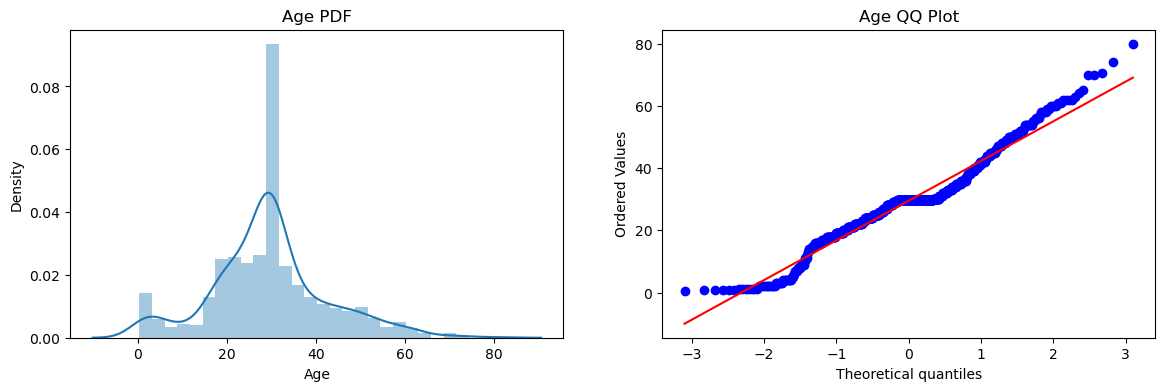

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()

C:\Users\91983\AppData\Local\Temp\ipykernel_22824\1767677806.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


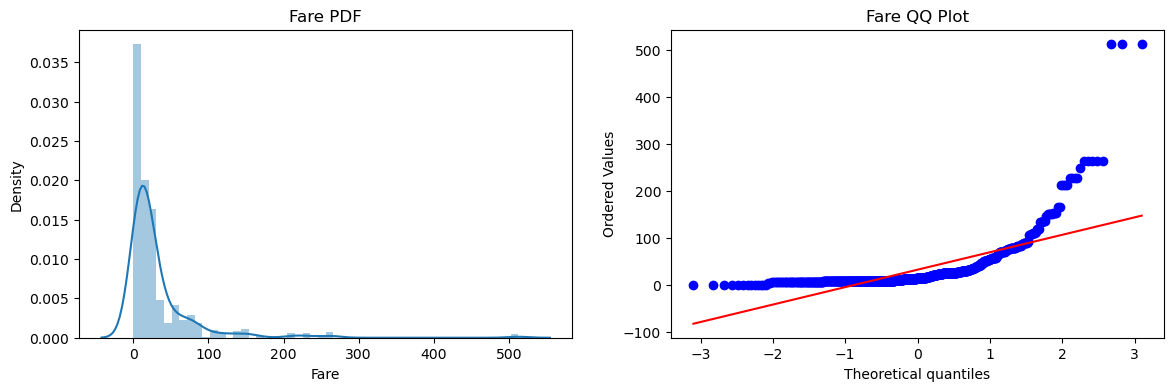

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')
plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')
plt.show()

<h5>The pdf is right skewed so we can go with log tranform </h5>

In [12]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [13]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_pred1=clf2.predict(x_test)
print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.659217877094972


In [14]:
trf=FunctionTransformer(func=np.log1p)

In [15]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.fit_transform(x_test)

In [16]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)
y_pred=clf.predict(x_test_transformed)
y_pred1=clf2.predict(x_test_transformed)
print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6927374301675978


<h3>after function tranform more effect is on logistic on de</h3>

In [17]:
x_transformed=trf.fit_transform(x)
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
print('LR',np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print('DT',np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6532459425717854


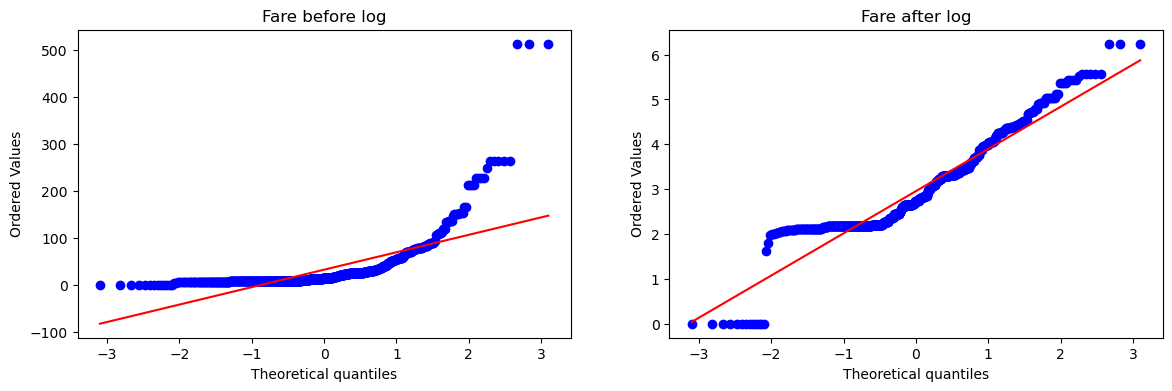

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare after log')
plt.show()

<h5>Effect after log function transformation in fare because it is right skewed</h5>

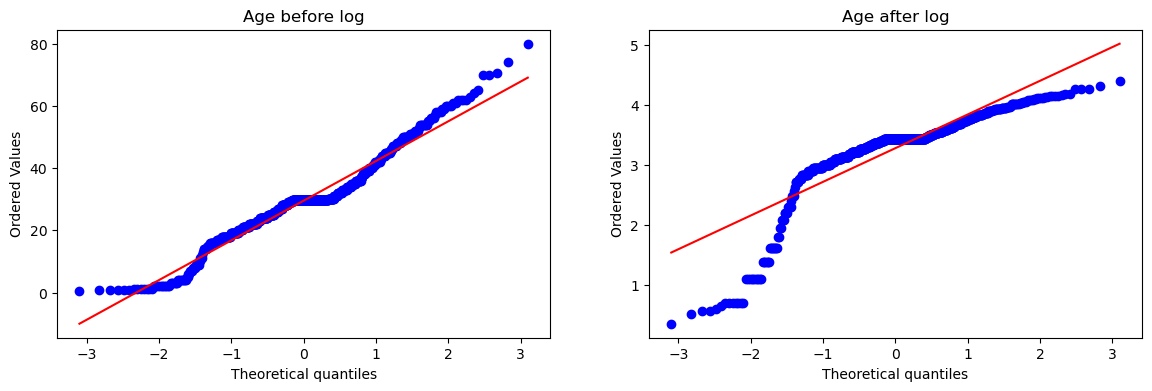

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age before log')
plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age after log')
plt.show()

<h5>after applying log function tranform on age it get deviated from 45* line so result get worst  </h5>

In [20]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
x_train_transformed2=trf2.fit_transform(x_train)
x_test_transformed2=trf2.transform(x_test)

In [21]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)
y_pred=clf.predict(x_test_transformed2)
y_pred1=clf2.predict(x_test_transformed2)
print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [22]:
def apply_transform(transform):
    # Split features and labels
    x = df.iloc[:, 1:3].copy()
    y = df.iloc[:, 0]

    # ColumnTransformer with specified log transform
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    
    # Transform features
    x_trans = trf.fit_transform(x)

    # Cross-validation using transformed features
    clf = LogisticRegression()
    print('Accuracy:', np.mean(cross_val_score(clf, x_trans, y, scoring='accuracy', cv=10)))

    # Plotting: before and after transformation
    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist='norm', plot=plt)
    plt.title('Fare before transform')

    plt.subplot(122)
    transformed_fare = transform(x['Fare'].values.reshape(-1, 1)).flatten()
    stats.probplot(transformed_fare, dist='norm', plot=plt)
    plt.title('Fare after transform')

    plt.show()

Accuracy: 0.61729088639201


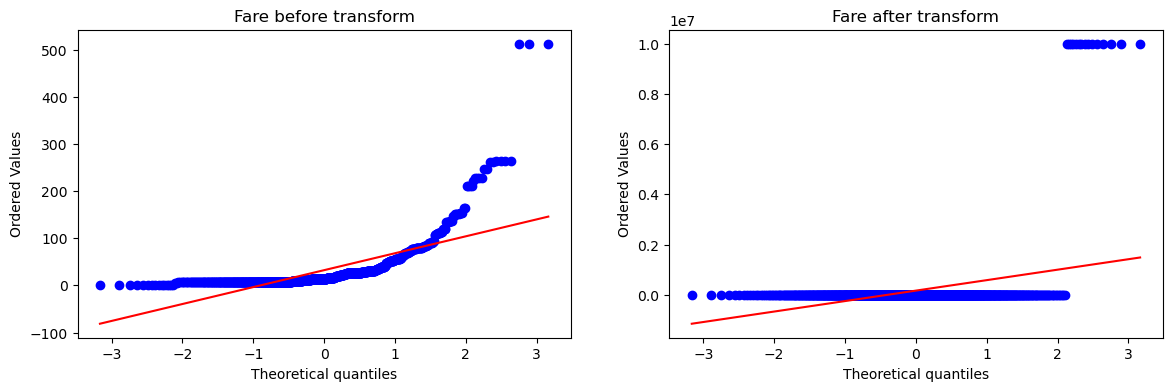

In [27]:
apply_transform(np.)